In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns

two subject, one possible region data（ahippo_lh, phippo_lh, ahippo_rh, phippo_rh）

In [ ]:
import deepdish as dd

def load_data_from_h5(filepath):
    data = dd.io.load(filepath)
    return data

# 两two subjects
file_path1 = 'F:\\project\\Attention\\fMRI_process\\Dataset\\MyData\\Results\\huxinqi20240411\\GLM1\\rois\\GLM1_SimilarityRDM_Spearman\\GLM1_SimilarityRDM_Spearman_within_modality_within_subj_ahippo_lh.h5' 
datad = load_data_from_h5(file_path1)
print(datad)

file_path2 = 'F:\\project\\Attention\\fMRI_process\\Dataset\\MyData\\Results\\dongsiqin20240411\\GLM1\\rois\\GLM1_SimilarityRDM_Spearman\\GLM1_SimilarityRDM_Spearman_within_modality_within_subj_ahippo_lh.h5'  
datah = load_data_from_h5(file_path2)

{'hippo': {'SemanDistanceIndex_between_subj_E_and_EB': array([[[-0.31428571,  0.31428571,  0.54285714, ..., -0.2       ,
         -0.25714286, -0.6       ],
        [-0.08571429,  0.48571429, -0.31428571, ...,  0.65714286,
          0.71428571,  0.42857143],
        [ 0.14285714,  0.08571429,  0.77142857, ...,  0.71428571,
         -0.08571429,  0.6       ],
        ...,
        [ 0.77142857,  0.65714286,  0.71428571, ...,  0.6       ,
          0.02857143,  0.94285714],
        [ 0.14285714, -0.14285714,  0.88571429, ...,  0.25714286,
          0.02857143,  0.37142857],
        [ 0.42857143,  0.2       ,  0.88571429, ...,  0.6       ,
         -0.14285714,  0.71428571]]]), 'SemanDistanceIndex_between_subj_E_and_EB_singletrial': array([[-0.31428571,  0.31428571,  0.54285714, -0.31428571,  0.25714286,
         0.2       ,  0.65714286, -0.2       , -0.25714286, -0.6       ]]), 'TopoDistanceIndex1_between_subj_E_and_EB': array([[[-0.48571429,  0.42857143,  0.37142857, -0.31428571,
       

In [22]:
print(datad["hippo"].keys())

print(datad["hippo"]["SemanDistanceIndex_between_subj_E_and_EB"][:,:].shape)
print(datad["hippo"]["sorted_trial_order_within_subj_beta[Eat]"][0].shape)

dict_keys(['SemanDistanceIndex_between_subj_E_and_EB', 'SemanDistanceIndex_between_subj_E_and_EB_singletrial', 'TopoDistanceIndex1_between_subj_E_and_EB', 'TopoDistanceIndex2_between_subj_E_and_EB', 'TopoDistanceIndex_between_subj_E_and_EB_singletrial', 'neuralRDM_between_subj_E_and_EB_singletrial', 'sorted_trial_order_within_subj_beta[Eat]', 'sorted_trial_order_within_subj_beta[Lan]', 'sorted_trial_order_within_subj_beta[rest]'])
(1, 501, 10)
(8, 60)


neural RDM（ahippo_lh, phippo_lh, ahippo_rh, phippo_rh）

In [ ]:
def transform_matrix(matrix):
    tril_indices = np.triu_indices_from(matrix, k=1)
    transformed_matrix = np.full(matrix.shape, np.nan) 
    transformed_matrix[tril_indices] = matrix[tril_indices] 
    return transformed_matrix

cut_matrices = []

for i in range(10):
    matrix = (datah["hippo"]["neuralRDM_between_subj_E_and_EB_singletrial"][:,:,i,0]+datad["hippo"]["neuralRDM_between_subj_E_and_EB_singletrial"][:,:,i,0])/2
    cut_matrix = transform_matrix(matrix)
    cut_matrices.append(cut_matrix)

print(cut_matrices[0])


flattened_matrices = []

for matrix in cut_matrices:
    flattened_matrix = matrix.flatten()
    valid_indices = ~np.isnan(flattened_matrix) 
    mean = np.mean(flattened_matrix[valid_indices])
    std = np.std(flattened_matrix[valid_indices])
    final = ((flattened_matrix[valid_indices]) - mean) / std
    flattened_matrices.append(final)

flattened_matrices = np.array(flattened_matrices)
print(flattened_matrices[0])

[[       nan 1.390414   1.09402612 1.18388441]
 [       nan        nan 1.05362601 1.10978049]
 [       nan        nan        nan 1.34217838]
 [       nan        nan        nan        nan]]
[ 1.52851796 -0.79756822 -0.09235    -1.11463294 -0.67392607  1.14995927]


<Figure size 720x576 with 0 Axes>

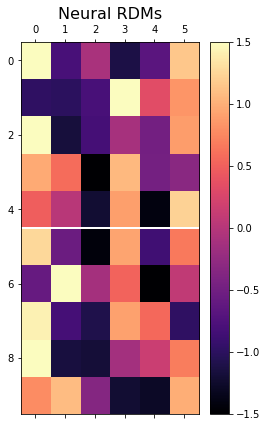

In [ ]:
stacked_matrix = np.vstack(flattened_matrices)

plt.figure(figsize=(10, 8))
plt.matshow(stacked_matrix, cmap='magma', aspect='auto',vmin = -1.5, vmax = 1.5)
plt.axhline(y = 4.5, color = 'w', linestyle = '-', linewidth = 2)
plt.title(f'Neural RDMs', fontsize=16)
plt.colorbar()

plt.show()


绘制violin图

In [ ]:
def GetZP(avg_results,roi, nPerm=500):
    '''avg_results is dict, roitype is list of strings of roi names'''
    
    roi = "{}"+str(roi)
    if avg_results[roi].shape[0] != 1:
        effnull = avg_results[roi].mean(0)[:,1:]
        eff = avg_results[roi].mean(0)[:,0]
        mean = avg_results[roi].mean(0).mean()
        std = avg_results[roi].mean(0).std()
    else:
        effnull = avg_results[roi][:,1:]
        eff = avg_results[roi][:,0]
        mean = avg_results[roi].mean()
        std = avg_results[roi].std()

    effnull = np.abs(effnull)
    eff = np.abs(eff)  
    ### get null mean and std
    #effnull_mean = effnull.mean() 
    #effnull_std = effnull.std() 

    ### standardize with average null
    #effnull = (effnull - mean)/std
    #eff = (eff - mean)/std 
    
    ### determine significance threshold relative to null in a non-parametric fashion
#     alpha = 0.05 / len(roitype) #threshold for significance controling for multiple comparisons

    if avg_results[roi].shape[0] != 1:
        real_data = avg_results[roi].mean(0)[0][0]
        control_data = avg_results[roi].mean(0)[0][1:]
    else:
        real_data = avg_results[roi][0][0]
        control_data = avg_results[roi][0][1:]

    count_higher = np.sum(real_data > control_data)
    count_equal = np.sum(real_data == control_data)
    proportion_higher = (count_higher + 0.5 * count_equal) / len(control_data)  # 添加了处理相等的情况

    pval_one_tailed = 1 - proportion_higher
    pval_two_tailed = 2 * min(pval_one_tailed, 1 - pval_one_tailed)

    pval = pval_two_tailed

    return eff,effnull,pval

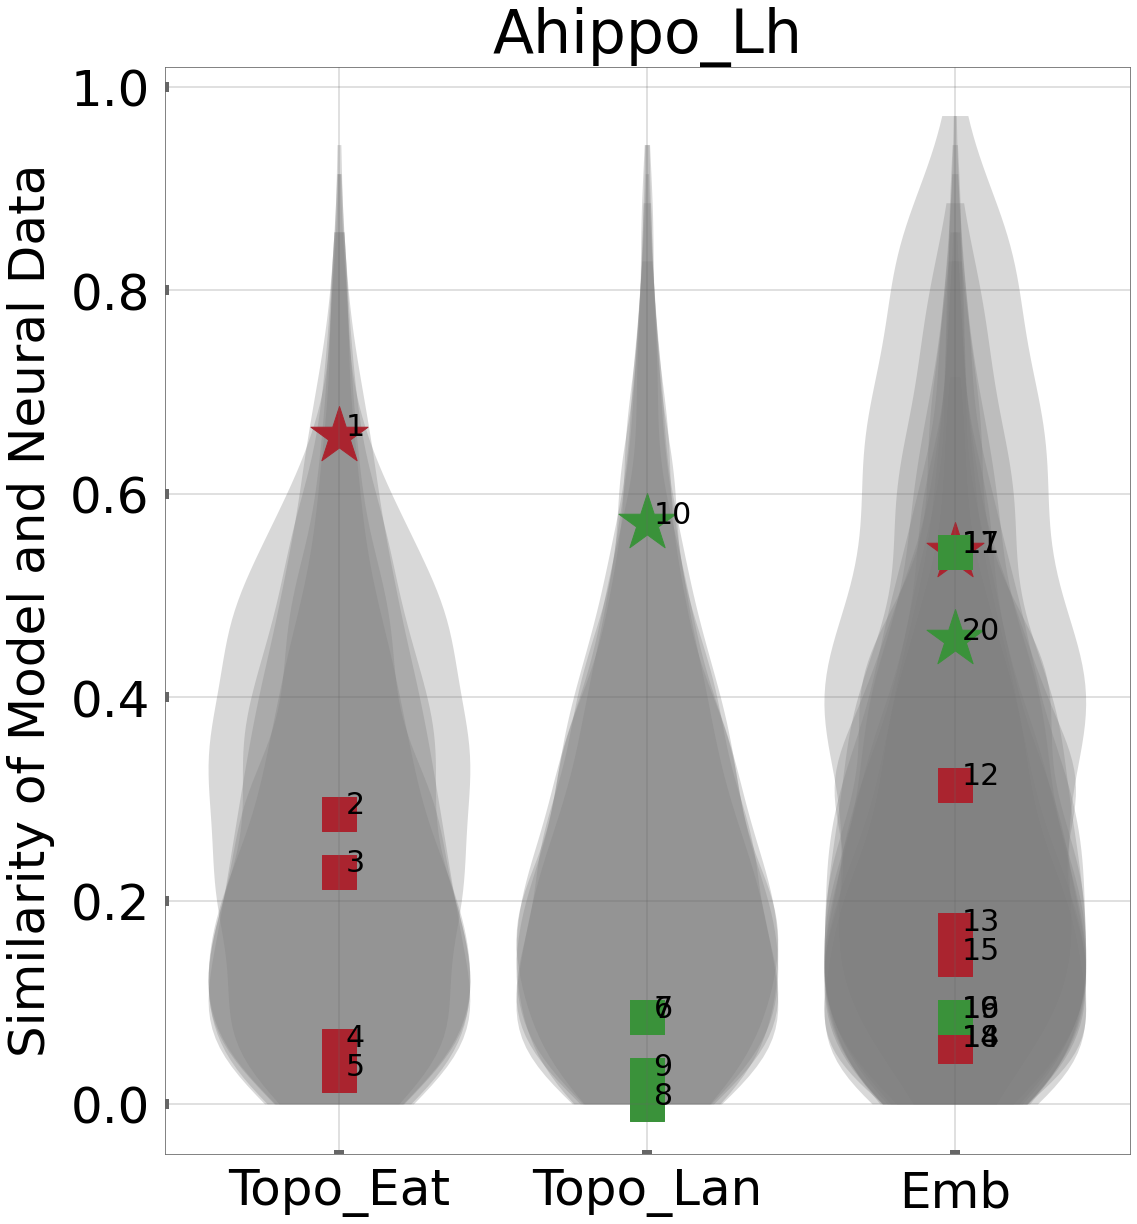

In [ ]:
#########################
#########################
datad1 = datad["hippo"]["TopoDistanceIndex1_between_subj_E_and_EB"]
datad2 = datad["hippo"]["TopoDistanceIndex2_between_subj_E_and_EB"]
datad3 = datad["hippo"]["SemanDistanceIndex_between_subj_E_and_EB"]
datah1 = datah["hippo"]["TopoDistanceIndex1_between_subj_E_and_EB"]
datah2 = datah["hippo"]["TopoDistanceIndex2_between_subj_E_and_EB"]
datah3 = datah["hippo"]["SemanDistanceIndex_between_subj_E_and_EB"]

## ROIs to plot
eat = ['1','2','3','4','5'] 
lan = ['6', '7', '8', '9', '10']
emb = ["11", "12", "13", "14", "15", "16", "17", "18", "19", "20"]

## Set up Plot Labels
# roi_n_names = tuple(((apriori_rois,hippo_rois, post_rois), (['a priori','hippo','post'])))
roi_n_names = tuple(((eat,lan,emb), (['Topo_Eat','Topo_Lan', "Emb"])))


extra = 'within_modality' # Main Figure

#########################
#########################

    
rois = eat + lan# +post_rois
average_results = {}
    
for i in range(5):
    average_results["{}"+str(i+1)] = (datad1[:,:,i] + datah1[:,:,i])/2
for i in range(5,10):
    average_results["{}"+str(i+1)] = (datad2[:,:,i-5] + datah2[:,:,i-5])/2
for i in range(10,20):
    average_results["{}"+str(i+1)] = (datad3[:,:,i-10] + datah3[:,:,i-10])/2
    
plt.figure(figsize=(17.3,20))
for rit, roitype in enumerate(roi_n_names[0]):

    pvals = []
    eff = []
    effnull = []
    for ri, roi in enumerate(roitype):
        eff_single, effnull_single, pval = GetZP(average_results,roi,500)
        pvals.append(pval)
        effnull.append(effnull_single[0])
        eff.append(eff_single[0])
    pvals = np.array(pvals) 
    vp = plt.violinplot(effnull, positions = np.ones(len(roitype))*rit,showextrema=False,widths=0.85); #draw null distribution as violin plot
    [v.set_facecolor('gray') for v in vp['bodies']] # set null distributions to color gray

    # significance threshold
    alpha = 0.05  

    # annotate figure 
    flip = -1
    sort_idx = np.argsort(eff) 
    # for ri,roi in enumerate(roitype):
    for ri,roi in enumerate(np.array(roitype)[sort_idx]):
        # xval = rit+(0.05)*flip  ; flip=flip*-1
        # xval = rit #np.random.choice([rit-0.2,rit+.2,rit,rit]) * np.random.normal(1,.05)

        xval =  rit 
        # color = 'red' if effsign[ri] > 0 else 'blue'
        color = '#aa242f' if roi in eat or roi in ["11", "12", "13", "14","15"] else '#3a923a' 

        pval = pvals[sort_idx][ri] #proportion[ri] / (nPerm + 1)

        if pval < alpha:
            marker = '*' ; size = 3600#360#120
        else:
            marker = 's' ; size = 1200#160#80

        plt.scatter(xval,np.array(eff)[sort_idx][ri],marker=marker,s=size,color=color);

        ann = plt.annotate('{}'.format(roi), (xval+0.02,np.array(eff)[sort_idx][ri]),color='k',fontsize=30)


        ### additional labels for figure
        # plt.xticks([0,1,2,3,4],['network', 'apriori', 'post','cluster','hippo'], fontsize=15)


#         plt.ylabel('z r^2', fontsize=20);
#         plt.xlabel("ROIs", fontsize=20);
#         plt.title("{} {}".format(effect.split('_')[0], effect.split('_')[1]), fontsize=25,y=1.03);

#         sns.despine(top=True, right=True, left=True, bottom=True)
sns.despine(top=False, right=False, left=False, bottom=False)
    
for spine in ['left','right','bottom','top']:
    plt.gca().spines[spine].set_color('#666666')

plt.title('Ahippo_Lh', fontsize=60)
plt.ylabel('Similarity of Model and Neural Data', fontsize=50,labelpad=15);
plt.grid(b=True, which='both', axis='both',color='#666666', linestyle='-',linewidth=2,alpha=0.2,zorder=3)
plt.tick_params(labelsize=50, width=10, length=4,color='#666666',direction='in',pad=15)
plt.xticks(range(len(roi_n_names[0])),roi_n_names[1], fontsize=50)


# plt.savefig(os.path.join('figs',path.split('/')[-2] + '_{}.png'.format(effect)),transparent=False,dpi=50) #dpi=400
# plt.savefig(os.path.join('figs',path.split('/')[-2] + '_{}_{}.png'.format(effect,extra)),transparent=False,dpi=50) #dpi=400
# plt.savefig(os.path.join('figs',path.split('/')[-2] + '_{}_{}.png'.format(effect,extra)),transparent=False,dpi=500) #dpi=400
plt.show()

绘制红蓝折线图（按照时间顺序排列语料）

In [30]:
order_d = [1,7,9,3,0,6,2,8,4,5]
order_h = [2,9,6,3,0,7,4,8,1,5]

datad_single1 = np.concatenate((datad['hippo']['TopoDistanceIndex1_between_subj_E_and_EB'], datad['hippo']['TopoDistanceIndex2_between_subj_E_and_EB']), axis = 2)
datah_single1 = np.concatenate((datah['hippo']['TopoDistanceIndex1_between_subj_E_and_EB'], datah['hippo']['TopoDistanceIndex2_between_subj_E_and_EB']), axis = 2)
datad_single2 = datad['hippo']['SemanDistanceIndex_between_subj_E_and_EB']
datah_single2 = datah['hippo']['SemanDistanceIndex_between_subj_E_and_EB']

datad_control1 = datad_single1[0,1:,order_d].T
datah_control1 = datah_single1[0,1:,order_h].T
datad_single1 = datad_single1[:,0,order_d]
datah_single1 = datah_single1[:,0,order_h]
datad_control2 = datad_single2[0,1:,order_d].T
datah_control2 = datah_single2[0,1:,order_h].T
datad_single2 = datad_single2[:,0,order_d]
datah_single2 = datah_single2[:,0,order_h]


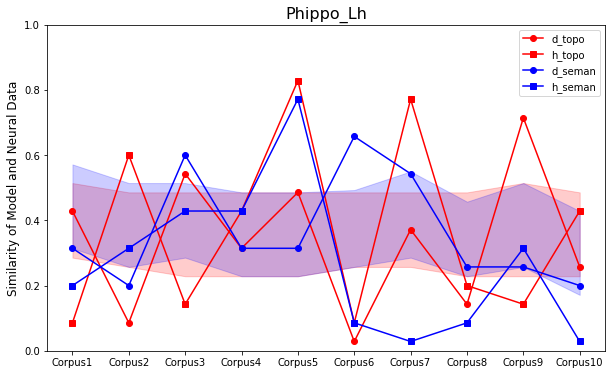

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# datad_single1, datah_single1, datad_single2, datah_single2  (1,10) numPy 
d_topo = np.abs(datad_single1.flatten())
h_topo = np.abs(datah_single1.flatten())
topo = (d_topo + h_topo) / 2
d_seman = np.abs(datad_single2.flatten())
h_seman = np.abs(datah_single2.flatten())
seman = (d_seman + h_seman) / 2

d_topo_samples = np.abs(datad_control1)
h_topo_samples = np.abs(datah_control1)
topo_samples = (d_topo_samples + h_topo_samples) / 2
d_seman_samples = np.abs(datad_control2)
h_seman_samples = np.abs(datah_control2)
seman_samples = (d_seman_samples + h_seman_samples) / 2

topo_median = np.median(topo_samples, axis=0)
topo_lower = np.percentile(topo_samples, 25, axis=0)
topo_upper = np.percentile(topo_samples, 75, axis=0)
seman_median = np.median(seman_samples, axis=0)
seman_lower = np.percentile(seman_samples, 25, axis=0)
seman_upper = np.percentile(seman_samples, 75, axis=0)

x = np.arange(10)

plt.figure(figsize=(10, 6))

#plt.plot(x, topo, marker='o', color='r', label='topo')
plt.plot(x, d_topo, marker='o', color='r', label='d_topo')
plt.plot(x, h_topo, marker='s', color='r', label='h_topo')

plt.fill_between(x, topo_lower, topo_upper, color='r', alpha=0.2)

#plt.plot(x, seman, marker='o', color='b', label='seman')
plt.plot(x, d_seman, marker='o', color='b', label='d_seman')
plt.plot(x, h_seman, marker='s', color='b', label='h_seman')

plt.fill_between(x, seman_lower, seman_upper, color='b', alpha=0.2)

plt.legend()

plt.title('Phippo_Lh', fontsize=16)
plt.xticks(range(10), ['Corpus1', 'Corpus2', 'Corpus3', 'Corpus4', 'Corpus5', 'Corpus6', 'Corpus7', 'Corpus8', 'Corpus9', 'Corpus10'])
plt.ylabel('Similarity of Model and Neural Data', fontsize=12)
plt.ylim(0, 1)

plt.show()

Beta coefficient相关的可视化

In [ ]:
import deepdish as dd
import numpy as np

def load_data_from_h5(filepath):
    data = dd.io.load(filepath)
    return data

file_path1 = 'F:\\project\\Attention\\fMRI_process\\Dataset\\MyData\\Results\\huxinqi20240411\\GLM1\\rois\\GLM1_SimilarityRDM_Spearman\\GLM1_SimilarityRDM_Spearman_within_modality_within_subj_ahippo_lh.h5'
datah1 = load_data_from_h5(file_path1)

file_path2 = 'F:\\project\\Attention\\fMRI_process\\Dataset\\MyData\\Results\\dongsiqin20240411\\GLM1\\rois\\GLM1_SimilarityRDM_Spearman\\GLM1_SimilarityRDM_Spearman_within_modality_within_subj_ahippo_lh.h5'
datad1 = load_data_from_h5(file_path2)

file_path3 = 'F:\\project\\Attention\\fMRI_process\\Dataset\\MyData\\Results\\huxinqi20240411\\GLM1\\rois\\GLM1_SimilarityRDM_Spearman\\GLM1_SimilarityRDM_Spearman_within_modality_within_subj_phippo_lh.h5'
datah2 = load_data_from_h5(file_path3)

file_path4 = 'F:\\project\\Attention\\fMRI_process\\Dataset\\MyData\\Results\\dongsiqin20240411\\GLM1\\rois\\GLM1_SimilarityRDM_Spearman\\GLM1_SimilarityRDM_Spearman_within_modality_within_subj_phippo_lh.h5'
datad2 = load_data_from_h5(file_path4)

datad_ahippo = datad1["hippo"]["sorted_trial_order_within_subj_beta[Eat]"]  # (5, 8, 60)
datad_phippo = datad2["hippo"]["sorted_trial_order_within_subj_beta[Eat]"]  # (5, 8, 60)

datah_ahippo = datah1["hippo"]["sorted_trial_order_within_subj_beta[Eat]"]  # (5, 8, 60)
datah_phippo = datah2["hippo"]["sorted_trial_order_within_subj_beta[Eat]"]  # (5, 8, 60)

time_intervals = ['event1', 'eboundary1', 'event2', 'eboundary2', 'event3', 'eboundary3', 'event4', 'eboundary4']

def reshape_data(data_ahippo, data_phippo):
    num_samples, num_time_intervals, num_voxels = data_ahippo.shape
    reshaped_data = np.zeros((num_samples, num_time_intervals, num_voxels * 2))  # 120 维 (60 + 60)

    for i in range(num_samples):
        for j in range(num_time_intervals):
            reshaped_data[i, j, :60] = data_ahippo[i, j, :]
            reshaped_data[i, j, 60:] = data_phippo[i, j, :]

    return reshaped_data


reshaped_datad = reshape_data(datad_ahippo, datad_phippo)
reshaped_datah = reshape_data(datah_ahippo, datah_phippo)


combined_data = np.vstack((reshaped_datad, reshaped_datah))

# combined_data: (10, 8, 120)
print(combined_data.shape)  

(10, 8, 120)


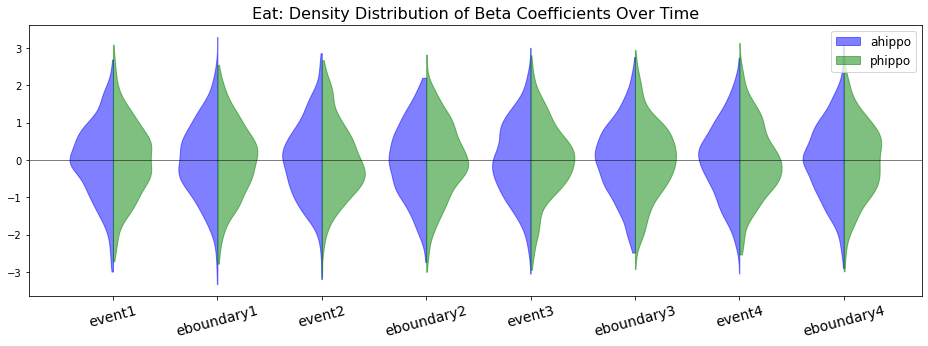

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde


plt.figure(figsize=(16, 5))

color_ahippo = 'blue'
color_phippo = 'green'

for i, time_label in enumerate(time_intervals):
    ahippo_data = combined_data[:, i, :60].flatten()
    phippo_data = combined_data[:, i, 60:].flatten()
    
    kde_ahippo = gaussian_kde(ahippo_data)
    kde_phippo = gaussian_kde(phippo_data)
    
    x_vals_ahippo = kde_ahippo(np.linspace(ahippo_data.min(), ahippo_data.max(), 100))
    x_vals_phippo = kde_phippo(np.linspace(phippo_data.min(), phippo_data.max(), 100))
    
    plt.fill_betweenx(np.linspace(ahippo_data.min(), ahippo_data.max(), 100), i - x_vals_ahippo, i, color=color_ahippo, alpha=0.5)
    plt.fill_betweenx(np.linspace(phippo_data.min(), phippo_data.max(), 100), i, i + x_vals_phippo, color=color_phippo, alpha=0.5)
    
plt.xticks(ticks=np.arange(len(time_intervals)), labels=time_intervals, rotation=15, fontsize=14)
plt.title('Eat: Density Distribution of Beta Coefficients Over Time', fontsize=16)
plt.legend(['ahippo', 'phippo'], loc='upper right', fontsize='large')
plt.axhline(0, color='black', linewidth=0.5)
plt.show()


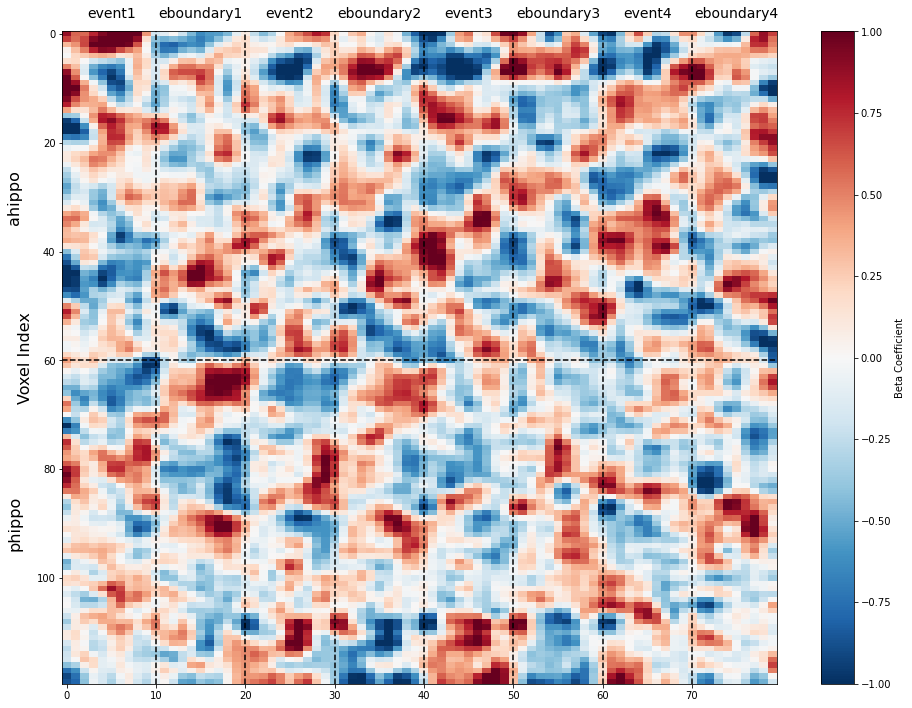

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter


fig, ax = plt.subplots(figsize=(16, 12))

cmap = plt.get_cmap('RdBu_r')

big_matrix = np.zeros((120, 80))

for i in range(8):
    ahippo_data = combined_data[:, i, :60].T  # (60, 10)
    phippo_data = combined_data[:, i, 60:].T  # (60, 10)
    
    big_matrix[:60, i*10:(i+1)*10] = ahippo_data
    big_matrix[60:, i*10:(i+1)*10] = phippo_data

smoothed_matrix = gaussian_filter(big_matrix, sigma=1)

im = ax.imshow(smoothed_matrix, aspect='auto', cmap=cmap, vmin = -1, vmax = 1)

for i in range(1, 8):
    ax.axvline(i*10, color='k', linestyle='--')
ax.axhline(60, color='k', linestyle='--')

#ax.set_title('Lan: Smoothed Distribution of Beta Coefficients Over Time', fontsize=16)

for i, time_label in enumerate(time_intervals):
    ax.text(i*10 + 5, -5, time_label, ha= 'center', va='top', fontsize=14)

ax.text(-5, 30, 'ahippo', ha='right', va='center', rotation=90, fontsize=16)
ax.text(-5, 90, 'phippo', ha='right', va='center', rotation=90, fontsize=16)

ax.set_ylabel('Voxel Index', fontsize=16)


cbar = fig.colorbar(im, ax=ax, orientation='vertical')
cbar.set_label('Beta Coefficient')

plt.show()
